# Tarea Semanal 5
## Martín Deleón

### Consignas:
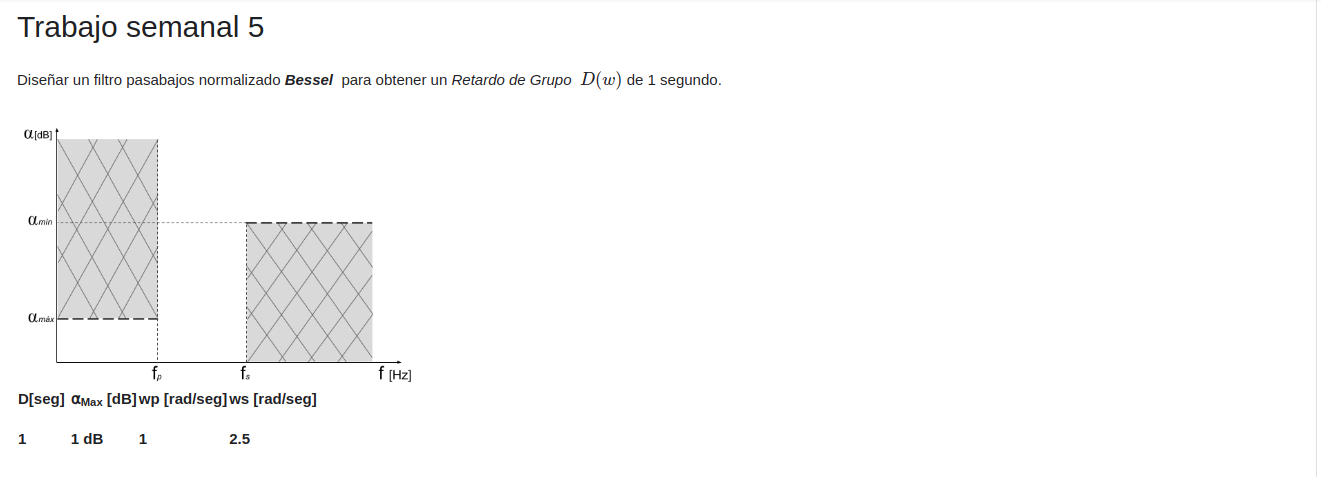
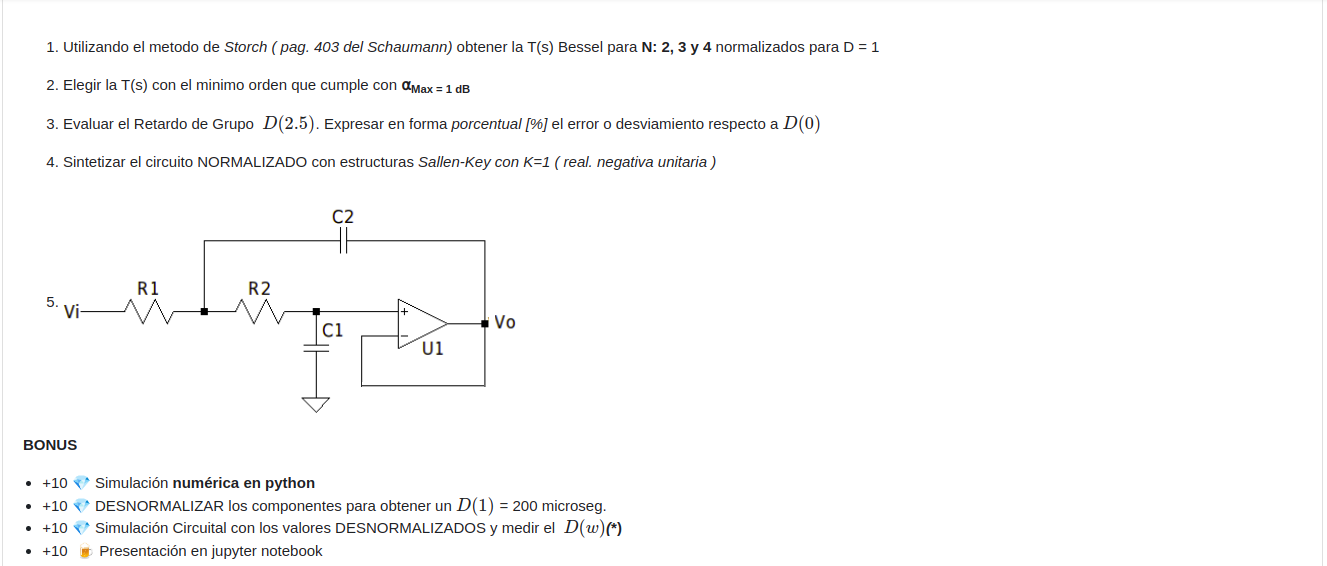

### 1. Busqueda de las transferencias solicitadas

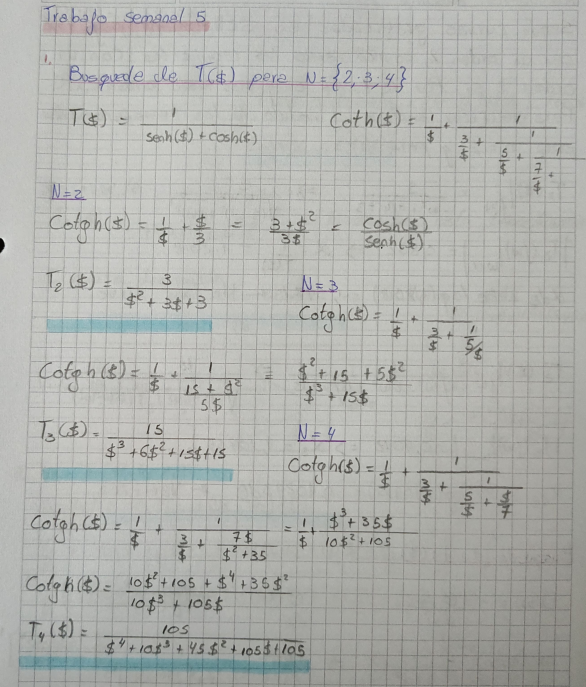

### 2. Determinación del orden del filtro a utilizar

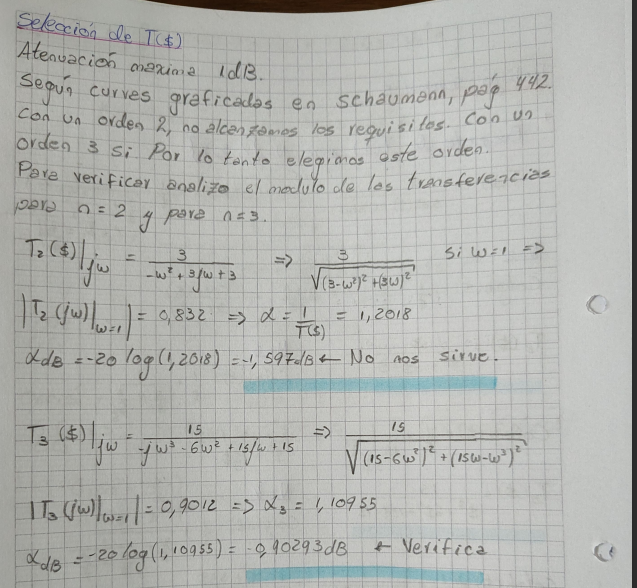

En este caso se verificó lo encontrado en los gráficos del libro dado que el enunciado asi lo pedia. De esta forma se determinó que el orden 2 no nos servia, pero el orden 3 cumplia, por lo tanto frenamos en este punto y seleccionamos dicho orden para continuar con la tarea.

En resumen se encontró un epsilon = 0.09647 y un filtro de orden 5 como minimo. Al igual que en anteriores entregas lo invito a ver el [pdf](https://drive.google.com/file/d/1_BKXce9Wqc7x4mUPKPESQUAIU79w4qtx/view?usp=sharing) de la tarea por separado para facilitar la compresión del procedimiento que intento explicar en este notebook.

### 3. Evaluar el retardo de grupo

Para realizar esta sección en primer lugar se obtuvo la expresión de la demora en funcion de omega de la siguiente manera.
\begin {equation}
    D(w) = \frac{-Phi(w)'}{dw}
\end {equation}

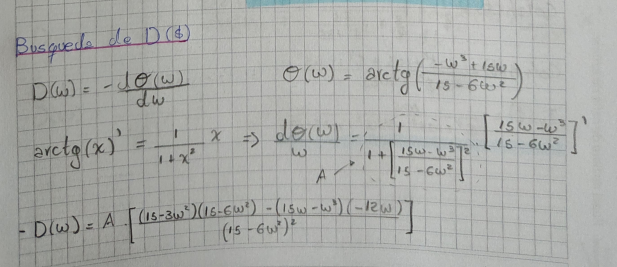
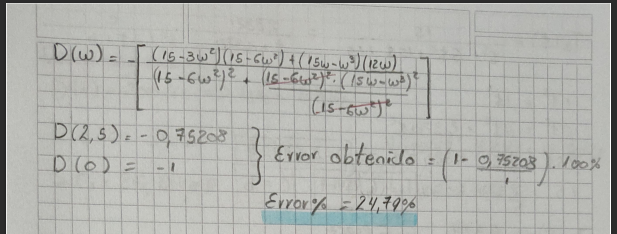

El procedimiento es puramente matemático y algo dificil de explicar por este medio, pero lo invito a ver el [pdf](https://drive.google.com/file/d/1gL57EGCIbB_-dYW0Fy6O-apTH50NqDp6/view) en donde resuelvo toda la tarea.
Como resultado se obtuvo un error del 24% que parece ser algo alto, pero como es el primer filtro de este tipo que realizo, no tengo contra que compararlo.

### 4. Sintesis del circuito

En este punto se calculó nuevamente la transferencia del filtro para que quede el procedimiento detallado, pero luego de hallar la misma se encuentra el proceso de sintesis.

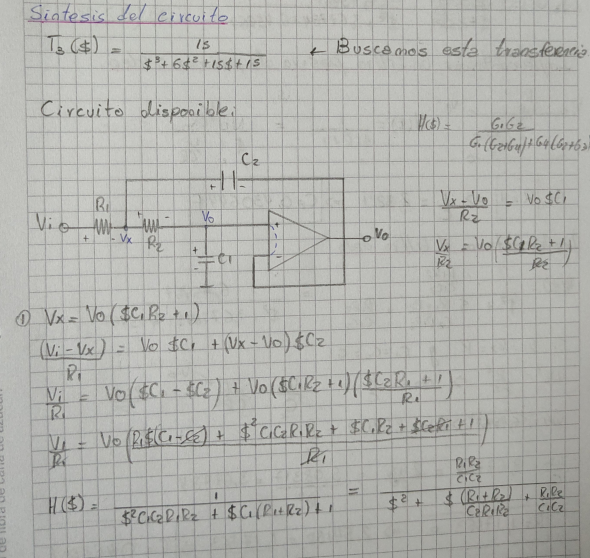
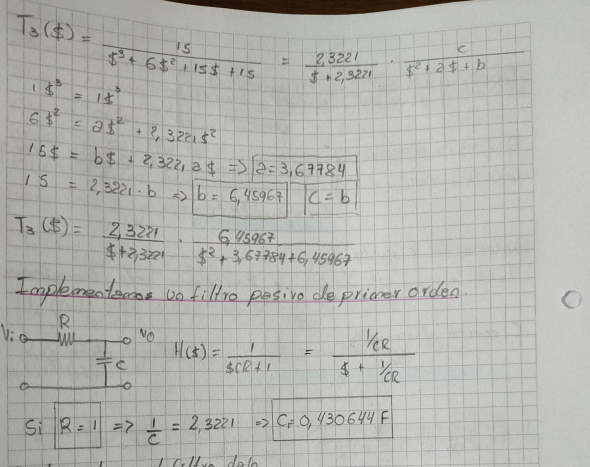
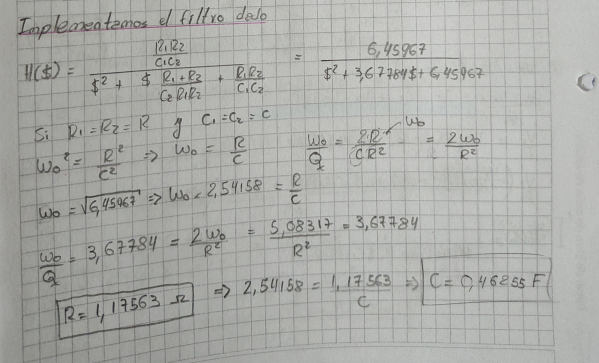

LLegado este punto se verificó mediante LTspice la respuesta de la red normalizada obteniendo las siguientes curvas:

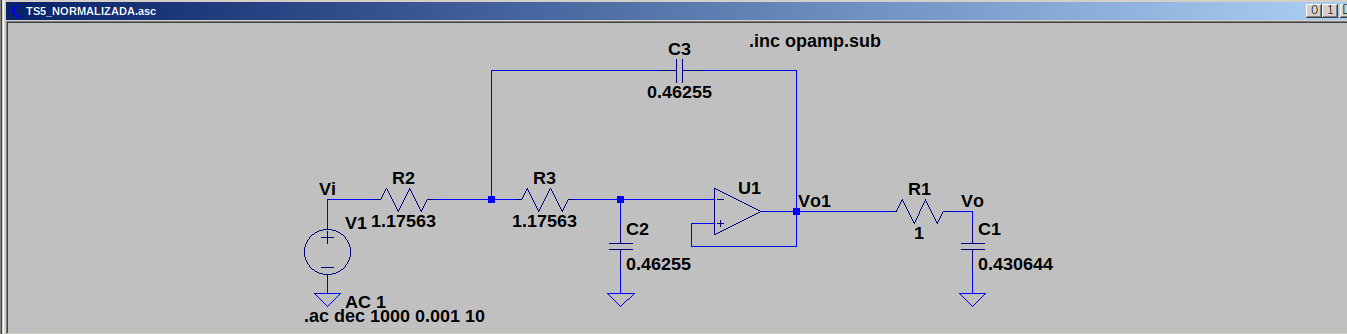
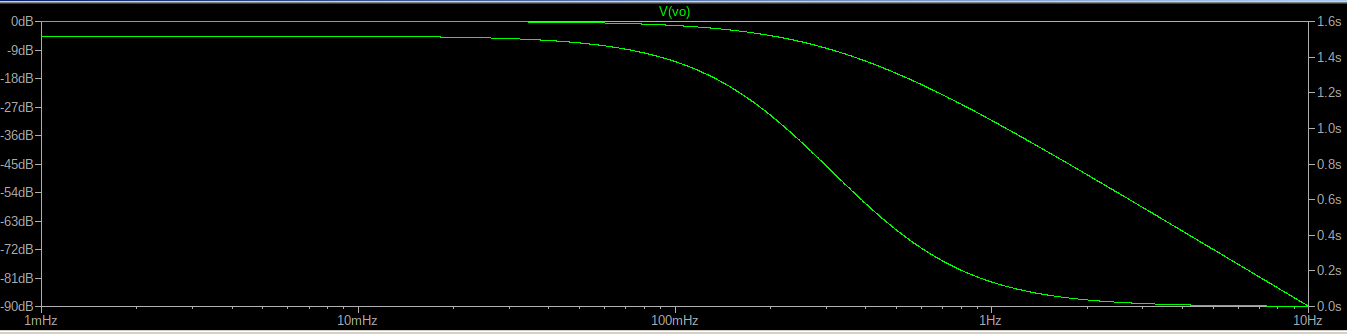

Al realizar esta simulación me encuentro algo perdido con los puntos a chequear. Espero poder consultarlo en breve poder corregir esto con la devolución de la TS.

En este punto resulta "fácil" realizar la desnormalización y volver a simular.

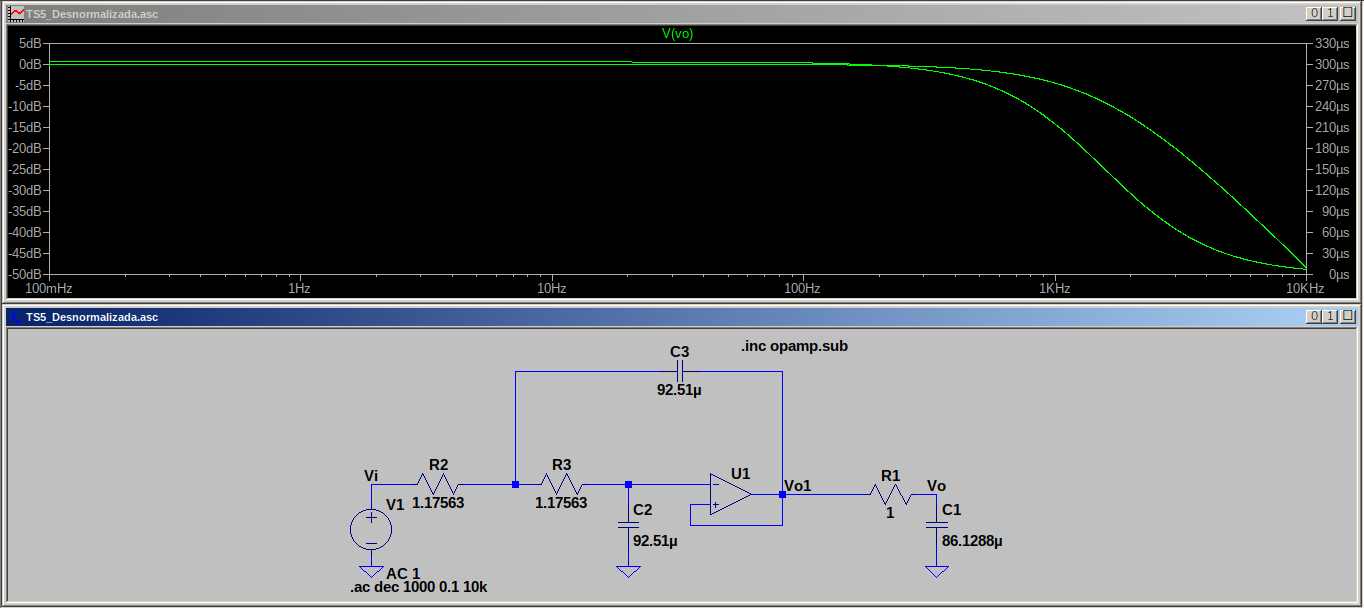

### 5. Simulación en python

In [5]:
#Importamos las librerias necesarias
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
from scipy.signal import besselap, bessel
from scipy.signal import freqz,zpk2tf,freqs,TransferFunction
from pytc2.sistemas_lineales import analyze_sys, pretty_print_lti, tf2sos_analog, pretty_print_SOS

from pytc2.general import Chebyshev_polynomials, s, w, print_subtitle
import sympy as sp
from IPython.display import display

%matplotlib ipympl
import matplotlib.pyplot as plt
import numpy as np



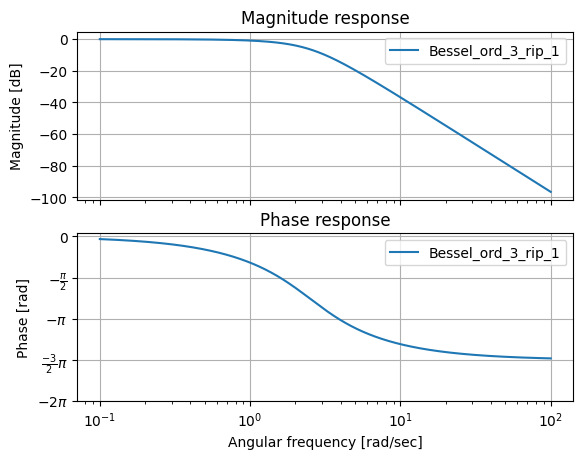

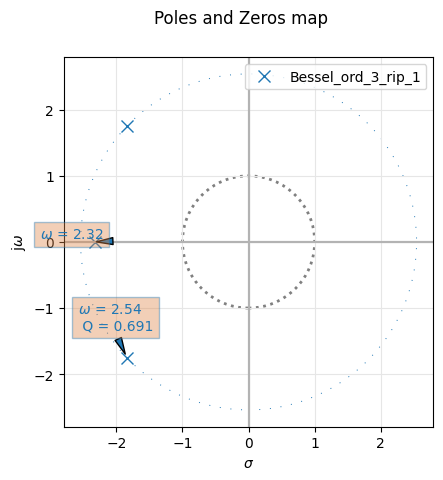

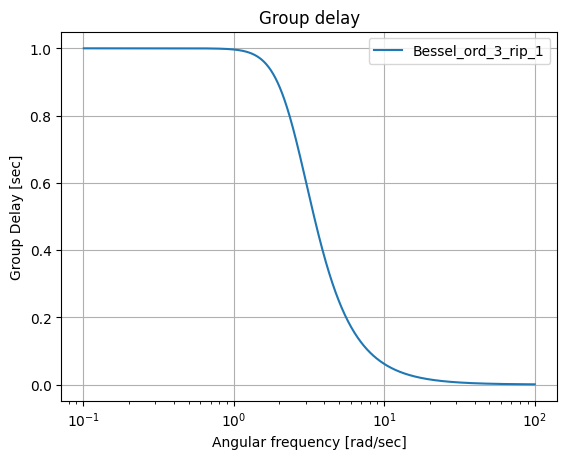

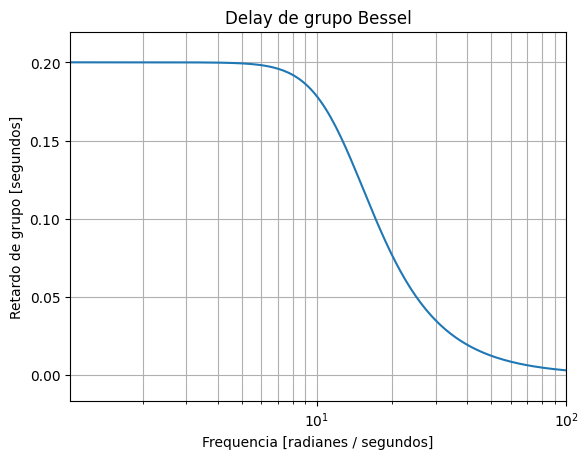

In [15]:
#Cargamos los datos del problema
dem = 200e-3
fs = 1/(2*dem)
fc = 0.1*fs
n = 3
alpha_max = 1
norma = 1/dem

filter_names = []
all_sys=[]

b, a = bessel(n, norma, 'low', analog=True, norm='delay')
z,p,k=besselap(n,norm='delay')
num,den=zpk2tf(z,p,k)
all_sys.append(TransferFunction(num,den))
this_aprox= 'Bessel'
this_label=this_aprox + '_ord_' + str(n) + '_rip_' + str(alpha_max) 

filter_names.append(this_label)
analyze_sys(all_sys,filter_names)

w, h = freqs(b, a)

plt.figure()

plt.semilogx(w[1:], -np.diff(np.unwrap(np.angle(h)))/np.diff(w))

plt.title('Delay de grupo Bessel')
plt.xlabel('Frequencia [radianes / segundos]')
plt.ylabel('Retardo de grupo [segundos]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.show()